In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn2

In [2]:
def get_significant(file_path):
    significants = []
    with open(file_path, "r") as f:
        datas = f.readlines()
        for data in datas[1:]:
            data = data.split()
            x, y = int(int(data[1])/1000), int(int(data[3])/1000)
            p_value, q_value = float(data[5]), float(data[6])
            concat = int(data[4])
            significants.append((x, y, p_value, q_value, concat))
    return significants

def cal_significant(significants, proportion):
    test = np.array(significants)
    
    def _filter(_values, max_nums, test):
        values_sort_index = _values.argsort()
        values_min_numbers_index = values_sort_index[max_nums-1]
        p = max_nums
        values_min_indexs = _values.argsort()[:p-1]
        _test = test[values_min_indexs, :]
        return _test

    _p_values = test[:, 2]
    _test = _filter(_p_values, int(_p_values.shape[0]*proportion), test)
    _q_values = _test[:, 3]
    _test = _filter(_q_values, int(_q_values.shape[0]*proportion), _test)
    return _test

def show_venn(active_sig_set, represses_sig_set):
    venn2(subsets = [represses_sig_set, active_sig_set], set_labels = ('represses', 'active'), set_colors=((247/255, 129/255, 191/255), (51/255, 160/255, 44/255)))
    plt.show()

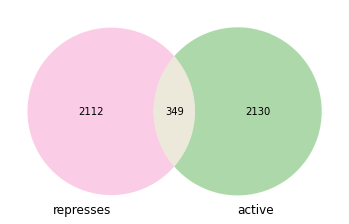

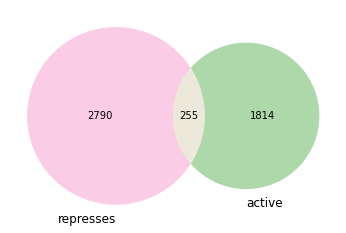

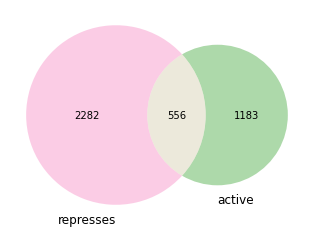

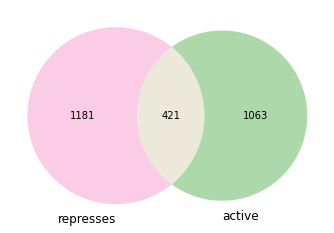

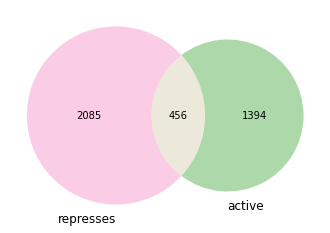

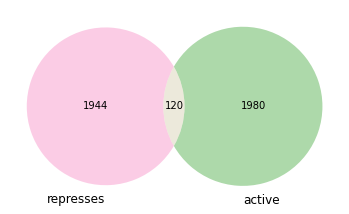

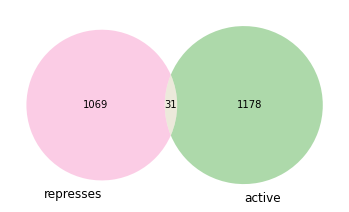

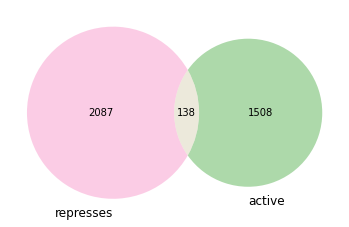

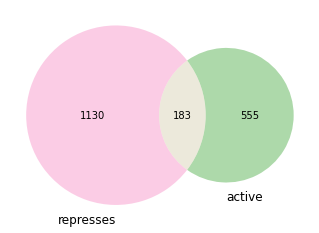

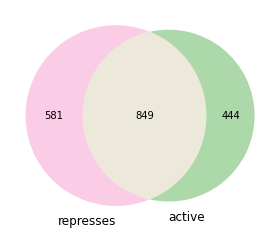

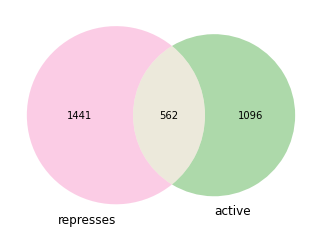

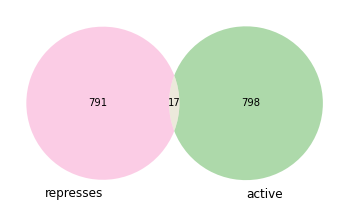

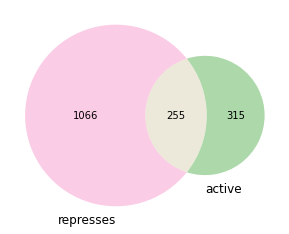

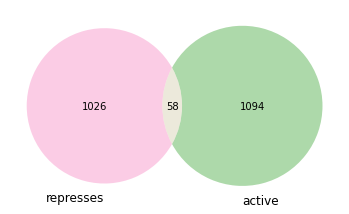

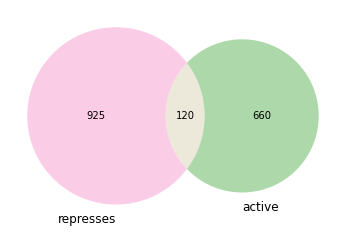

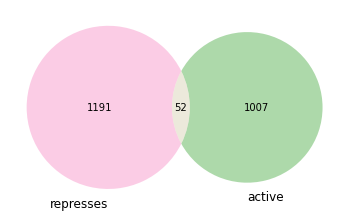

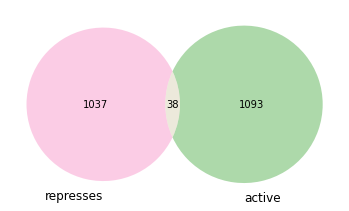

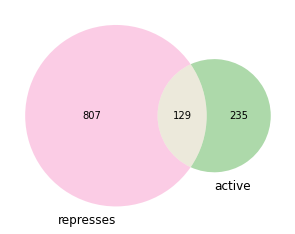

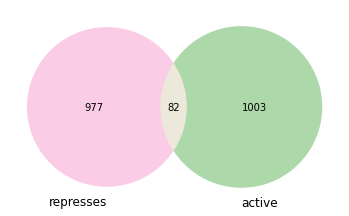

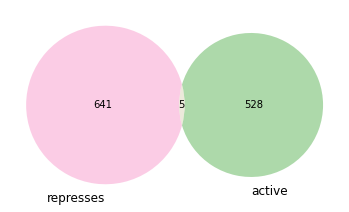

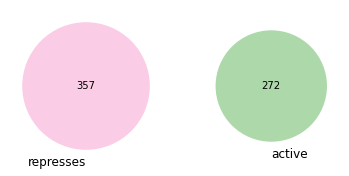

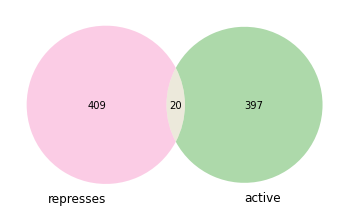

In [3]:
active_path = '/data1/lmh_data/MINE/GM12878_ATAC_H3K27ac_H3K4me3/analyse/GM12878_ATAC_H3K27ac_H3K4me3/experiment/loop/enhanced'
represses_path = '/data1/lmh_data/MINE/GM12878_H3K9me3_H3K27me3/analyse/GM12878_H3K9me3_H3K27me3/experiment/loop/enhanced'
proportion = 0.015

# 未去交集的全部sig
active_sigs, represses_sigs = set(), set()
for chr in range(1, 23):
    active_file_path = os.path.join(active_path, 'chr{}_1000b'.format(chr), 'outputs_2_100', 'FitHiC.spline_pass1.res1000.significances.txt')
    represses_file_path = os.path.join(represses_path, 'chr{}_1000b'.format(chr), 'outputs_2_100', 'FitHiC.spline_pass1.res1000.significances.txt')
    active_sig = cal_significant(get_significant(active_file_path), proportion)
    represses_sig = cal_significant(get_significant(represses_file_path), proportion)
    
    _active_sig = set(list(map(tuple, np.array(active_sig)[:, :2])))
    _represses_sig = set(list(map(tuple, np.array(represses_sig)[:, :2])))
    show_venn(_active_sig, _represses_sig)
    
    for sig in _active_sig:
        _sig = list(sig)
        _sig.append('chr{}'.format(chr))
        active_sigs.add(tuple(_sig))
    for sig in _represses_sig:
        _sig = list(sig)
        _sig.append('chr{}'.format(chr))
        represses_sigs.add(tuple(_sig))

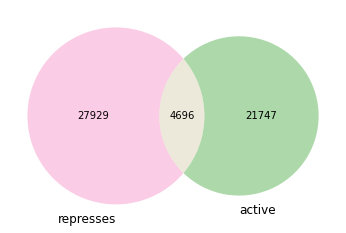

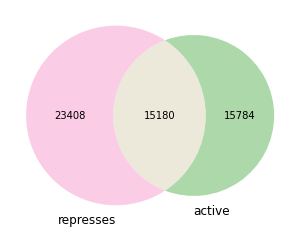

In [4]:
show_venn(active_sigs, represses_sigs)

_active_sigs = active_sigs.copy()
_represses_sigs = set()
for _represses_sig in represses_sigs:
    flag = False
    for _active_sig in _active_sigs:
        if abs(_represses_sig[0]-_active_sig[0])<3 and abs(_represses_sig[1]-_active_sig[1])<3:
            _represses_sigs.add(_active_sig)
            flag = True
    _represses_sigs.add(_represses_sig)
    if flag:
        _active_sigs.add(_represses_sig)

show_venn(_active_sigs, _represses_sigs)